In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
import os
import pylab as plt
import geopandas as gpd
import seaborn as sns
#import adjustText as aT
sns.set(style="darkgrid")
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from glob import glob
from os.path import isfile, join
import sys
import pylab as pl

path_r8 = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/'
path_stata_output = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/stata_output/'
path_plots = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/plots/lollipop/'
path_paper_final='/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/plots/final_paper/'



In [2]:
ld_nld = pd.read_csv(path_paper_final+'q1_subgroup_for_lollipop_200.csv', sep=',')

ld_nld.head()


,subgroup,before lockdown: feb 2020,lockdown period: april-may 2021,post lockdown: sept - dec 2022,perc_reduction_ld_nld,Marginal reduction,reduction if using perc
0,Overall,20.0,15.0,6.0,25%,-10.376,5.0
1,GENDER,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,37.0,23.0,8.0,38%,-14.390,5.0
3,Female,13.0,11.0,5.0,15%,-7.570,4.0
4,SOCIO-ECONOMIC STATUS,NaN,NaN,NaN,NaN,NaN,NaN


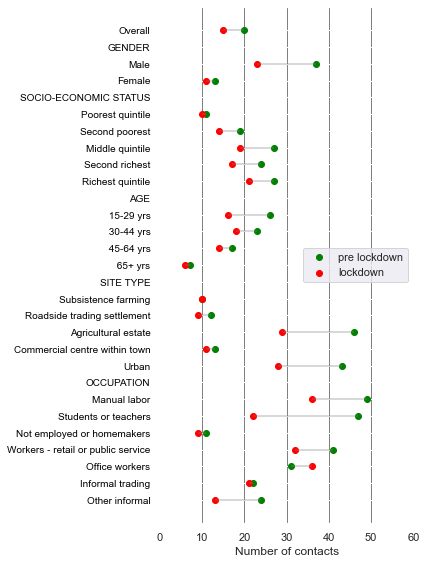

In [3]:
# Reorder it following the values of the first value:
ordered_df = ld_nld
#ordered_df = dist_true_plus_sim[['districtId', 'true_cases_by_dist', 'sim_tot_cases_dist_med']]

my_range=range(1,len(ld_nld.index)+1)
fig, ax = plt.subplots (figsize = (6, 8))

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=list(ordered_df['lockdown period: april-may 2021']), xmax=list(ordered_df['before lockdown: feb 2020']), color='grey', alpha=0.4)
plt.scatter(ordered_df['before lockdown: feb 2020'], my_range, color='green', alpha=1, label='pre lockdown')
plt.scatter(ordered_df['lockdown period: april-may 2021'], my_range, color='red', alpha=1 , label='lockdown')
#plt.scatter(ordered_df['post lockdown: sept - dec 2022'], my_range, color='blue', alpha=1 , label='post lockdown')

plt.legend(loc='center right')
 
# Add title and axis names
plt.yticks(my_range, ordered_df['subgroup'], fontsize=10, weight=14, color='black')
#plt.title("Comparison between contact rates in \npre (Feb 2020),  & during (April-May 2020) \nlockdowns  Source: Manicaland \nCentre R8 2021 (max 200)", loc='left')
plt.xlabel('Number of contacts')
#plt.ylabel('Subgroup')
ax.set_facecolor('white')
plt.grid(color='grey', axis="x")
plt.axvline(0, color="green", linewidth=1) # adding black line

#invert axis 
plt.gca().invert_yaxis()

# use adjust text function 
plt.tight_layout()
#limit range on axis
plt.xlim([0, 60])

# Show the graph
plt.savefig(path_paper_final+'pre_post_lolipop_subgroup_order_200.png', dpi=300)


In [1]:
# # Reorder it following the values of the first value:
# ordered_df = ld_nld.sort_values(by='nld_all_ages_contacts_week')
# #ordered_df = dist_true_plus_sim[['districtId', 'true_cases_by_dist', 'sim_tot_cases_dist_med']]

# my_range=range(1,len(ld_nld.index)+1)
# fig, ax = plt.subplots (figsize = (8, 8))


# # The horizontal plot is made using the hline function
# plt.hlines(y=my_range, xmin=list(ordered_df['ld_all_ages_contacts_week']), xmax=list(ordered_df['nld_all_ages_contacts_week']), color='grey', alpha=0.4)
# plt.scatter(ordered_df['nld_all_ages_contacts_week'], my_range, color='green', alpha=1, label='total contacts non lockdown')
# plt.scatter(ordered_df['ld_all_ages_contacts_week'], my_range, color='red', alpha=0.4 , label='total contacts lockdown')
# plt.legend(loc='lower right')
 
# # Add title and axis names
# plt.yticks(my_range, ordered_df['subgroup'], fontsize=12, weight=12, color='black')
# plt.title("Comparison between contact rates in lockdown vs. non lockdown. \n Source: Manicaland Centre R8 2021 (max 200)", loc='left')
# plt.xlabel('Number of contacts')
# plt.ylabel('Subgroup') 

# # use adjust text function 
# plt.tight_layout()
# #limit range on axis
# plt.xlim([0, 60])

# # Show the graph
# plt.savefig(path_paper_final+'contacts_ind_lolipop_contact_order_200.png', dpi=300)


## contacts by place

In [3]:
ld_nld = pd.read_csv(path_paper_final+'q1_place_for_lollipop_200.csv', sep=',')

ld_nld.head()

,place,mean_nld,mean_ld
0,home,6.9,6.4
1,work,27.8,22.6
2,school,46.8,29.9
3,transport,21.0,12.5
4,entertainment,16.3,9.8


In [4]:
# Reorder it following the values of the first value:
ordered_df = ld_nld.sort_values(by='mean_nld')
#ordered_df = dist_true_plus_sim[['districtId', 'true_cases_by_dist', 'sim_tot_cases_dist_med']]


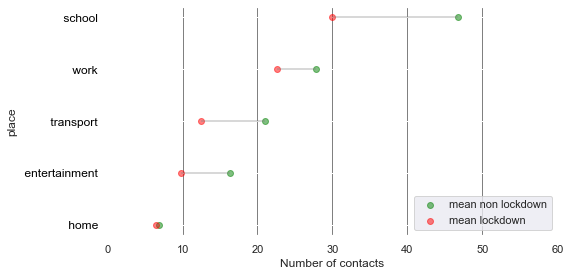

In [5]:

my_range=range(1,len(ld_nld.index)+1)
fig, ax = plt.subplots (figsize = (8, 4))

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=list(ordered_df['mean_ld']), xmax=list(ordered_df['mean_nld']), color='grey', alpha=0.4)
plt.scatter(ordered_df['mean_nld'], my_range, color='green', alpha=0.5, label='mean non lockdown')
plt.scatter(ordered_df['mean_ld'], my_range, color='red', alpha=0.5 , label='mean lockdown')
plt.legend(loc='lower right')

# Add title and axis names
plt.yticks(my_range, ordered_df['place'], fontsize=12, weight=12, color='black')
#plt.title("Comparison between contact rates in lockdown vs. non lockdown \n - means by place. Source: Manicaland Centre R8 2021", loc='left')
plt.xlabel('Number of contacts')
plt.ylabel('place') 
ax.set_facecolor('white')
plt.grid(color='grey', axis="x")
plt.axvline(0, color="green", linewidth=1) # adding black line


# use adjust text function 
plt.tight_layout()
#limit range on axis
plt.xlim([0, 60])

# Show the graph
plt.savefig(path_paper_final+'contacts_ind_lolipop_contact_place_level.png', dpi=300)
